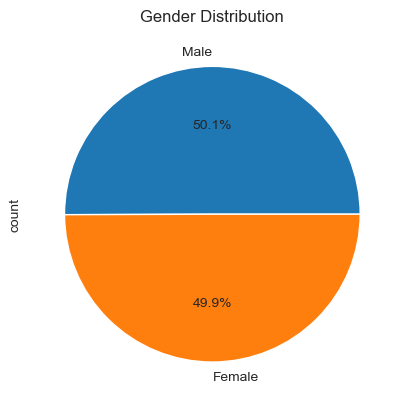

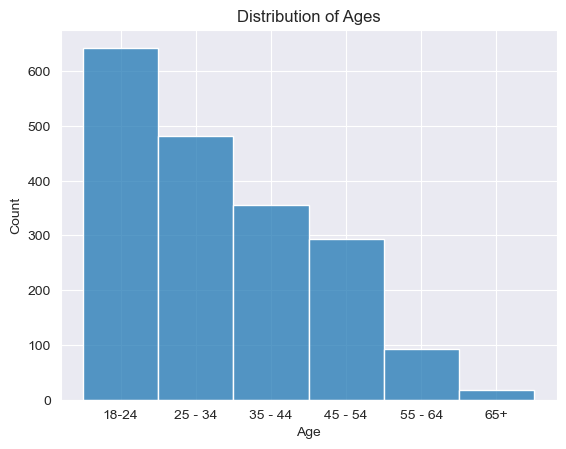

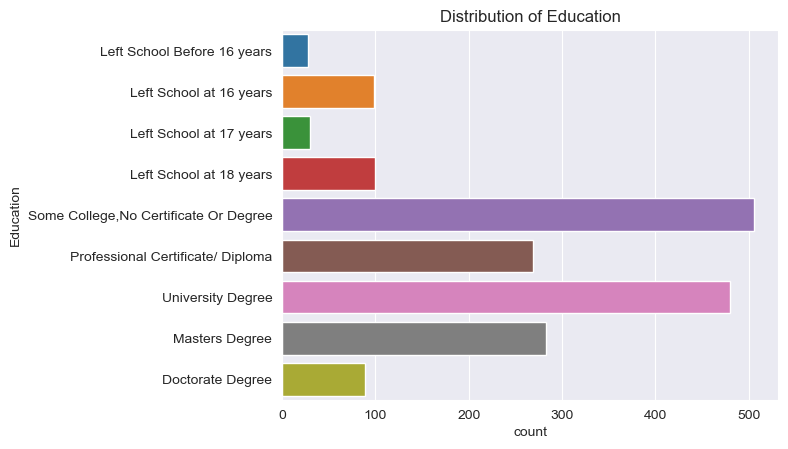

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('Drug_Consumption_Quantified.csv')

df.drop("ID", axis=1, inplace=True)
psych_score_cols = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensationness']
demographic_cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
drug_usage_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Resource: https://www.kaggle.com/code/mexwell/starter-notebook-convert-column-values

# Convert categorical values to human readable
age_col = {
    -0.95197: '18-24',
    -0.07854: '25 - 34',
    0.49788: '35 - 44',
    1.09449: '45 - 54',
    1.82213: '55 - 64',
    2.59171: '65+'
}
df['Age'] = df['Age'].replace(age_col)

gender_col = {
    0.48246: 'Female',
    -0.48246: 'Male'
}
df['Gender'] = df['Gender'].replace(gender_col)

education_col = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College,No Certificate Or Degree',
    -0.05921: 'Professional Certificate/ Diploma',
    0.45468: 'University Degree',
    1.16365: 'Masters Degree',
    1.98437: 'Doctorate Degree',
}
df['Education'] = df['Education'].replace(education_col)
df['Education'] = pd.Categorical(df['Education'], ['Left School Before 16 years',
                                                   'Left School at 16 years',
                                                   'Left School at 17 years',
                                                   'Left School at 18 years',
                                                   'Some College,No Certificate Or Degree',
                                                   'Professional Certificate/ Diploma',
                                                   'University Degree',
                                                   'Masters Degree',
                                                   'Doctorate Degree'
                                                   ])

country_col = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}
df['Country'] = df['Country'].replace(country_col)

ethnicity_col = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_col)

# Rename drug usage column values for readability
for d in drug_usage_cols:
    df[d].replace({
        "CL0": "Never",
        "CL1": "Over 10Y",
        "CL2": "Last 10Y",
        "CL3": "Last 1Y",
        "CL4": "Last 1M",
        "CL5": "Last 1W",
        "CL6": "Last 1D"
    }, inplace=True)

# Rename psychological score columns for readability
df.rename(columns={
    'Nscore': 'Neuroticism',
    'Escore': 'Extraversion',
    'Oscore': 'Openness',
    'Ascore': 'Agreeableness',
    'Cscore':'Conscientiousness',
    'Impulsive':'Impulsiveness',
    'SS': 'Sensationness'
}, inplace=True)

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()
plt.clf()

df.sort_values(['Age'], inplace=True)
sns.histplot(x='Age', data=df)
plt.title('Distribution of Ages')
plt.show()
plt.clf()

df.sort_values(['Education'], inplace=True)
sns.countplot(y='Education', data=df)
plt.title('Distribution of Education')
plt.show()
plt.clf()